
$ \renewcommand{\ket}[1]{|#1\rangle} $

$ \renewcommand{\bra}[1]{\langle #1|} $

$ \renewcommand{\braket}[2]{\langle #1|#2\rangle} $


## Alumno: Zhengkai Zhu 

<h1><font color="#004D7F" size=15>¿Qué es Qiskit?</font></h1>

 - Qiskit es un kit de desarrollo software **(SDK)**, **open source** y creado por **IBM**, para trabajar con ordenadores cuánticos a nivel de **circuitos**, **pulsos** y **algoritmos**.
 - Qiskit permite desarrollar software cuántico tanto a nivel de código máquina **(OpenQASM)** como a niveles más altos sin necesitar experiencia en computación cuántica.

<h1><font color="#003D7F" size=5>Componentes</font></h1>



```
# Tiene formato de código
```


<figure>
  <img src="Aer.png" alt="Qiskit elements" width=700>
  <center><figcaption>Fuente: <a href="https://qiskit.org">https://qiskit.org</a></figcaption></center>
</figure>

Los 4 componentes de Qiskit principales son:
   - **Terra**: Este componente es el componente principal del que todos los demás dependen. Proporciona herramientas para:
     - Crear programas cuánticos al nivel de circuitos o pulsos
     - Optimizar programas cuánticos dependiendo del dispositivo en el que se vaya a ejecutar.
     - Gestionar las ejecuciones en dispositivos remotos.
     - Visualizar los programas cuánticos y los resultados de ejecutar dichos programas cuánticos
   - **Aer**: Este componente proporciona la parte de la simulación de Qiskit, con un alto rendimiento y con modelo de ruido realistas. Aer proporciona 3 simuladores de alto rendimiento:
     - **QasmSimulator**: Permite la ejecución de circuitos y devuelve el resultado de las medidas realizadas.
     - **StatevectorSimulator**: Permite la ejecución de circuitos una sola vez y devuelve el vector final tras la ejecución.
     - **UnitarySimulator**: Permite la ejecución una sola vez y devuelve la matriz final tras la ejecución.
   - **Aqua**: Este componente proporcionaba un conjunto de algoritmos para construir aplicaciones de diferentes dominios. Ya se le ha dejado de dar soporte y ahora se ha dividido en los componentes **Qiskit Optimization**, **Qiskit Finance**, **Qiskit Machine Learning** y **Qiskit Nature**.
   - **Ignis**: Actualmente está obsoleto y algunas de sus funcionalidades se han migrado a **Qiskit Terra** y **Qiskit Experiments**. Este componente estaba dedicado a:
     - Verficación de hardware cuántico.
     - Corrección de errores.
     - Caracterización del riudo.


En esta asignatura vamos a utilizar **Terra** y **Aer**.

In [1]:
!pip install qiskit qiskit-aer

In [2]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit_aer
!pip install pylatexenc

<h1><font color="#003D7F" size=5>Ejemplo de un circuito cuántico</font></h1>

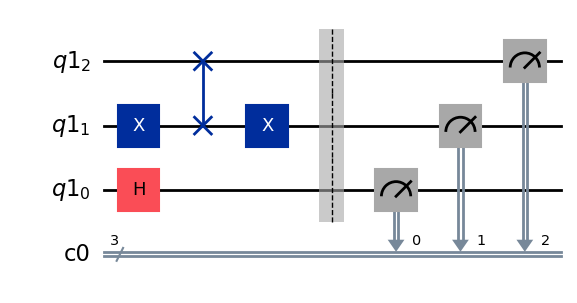

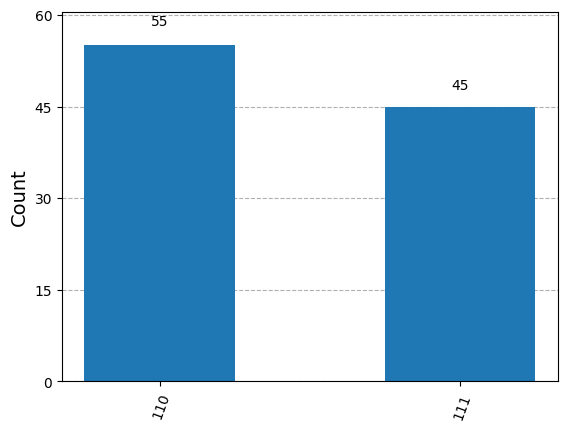

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

import warnings
warnings.filterwarnings("ignore")

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3)

#Creamos el registro clásico de bits
creg = ClassicalRegister(3)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito cuántico')
circ.x(qreg[1])
circ.swap(qreg[1], qreg[2])
circ.h(qreg[0])
circ.x(qreg[1])
circ.barrier()

#Añadimos las medidas
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

#Mostramos los resultados
plot_histogram(counts)


<h1><font color="#003D7F" size=5>Pasos para la creación y ejecución de un circuito</font></h1>

Los pasos son los siguientes:
   1. Importar los módulos necesarios para nuestro circuito.
   2. Crear los **registros de qubits** necesarios para el circuito.
   3. Crear los **registros de bits** necesarios para el circuito.
   4. Crear el circuito, incluyendo los registros creados anteriormente, con **QuantumCircuit()**.
   5. Añadimos las puertas y operadores necesarios al circuito.
   6. Añadimos las medidas a los qubits del registro de qubits que queramos medir y lo volcamos en los bits de los registros de bits que deseemos.
   7. Mostramos el circuito **(Opcional)**.
   8. Ejecutamos el circuito en un computador real o en un simulador de los disponibles.
   9. Mostramos los resultados.

<h1><font color="#003D7F" size=5>Registros cuánticos</font></h1>

Para crear un registro cuántico se utiliza la función **QuantumRegister(size, name)**:
   - **size**: Número entero que indica el tamaño del registro.
   - **name**: String que indica el nombre del registro. El nombre debe cumplir las restricciones de los nombres de variables de **OpenQASM**. **(Opcional)**

In [ ]:
from qiskit import QuantumRegister

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3, name="registro_cuantico_1")

<h1><font color="#003D7F" size=5>Registros clásicos</font></h1>

Para crear un registro clásico se utiliza la función **ClassicalRegister(size, name)**:
   - **size**: Número entero que indica el tamaño del registro.
   - **name**: String que indica el nombre del registro. El nombre debe cumplir las restricciones de los nombres de variables de **OpenQASM**. **(Opcional)**

In [ ]:
from qiskit import ClassicalRegister

#Creamos el registro clásico de bits
creg = ClassicalRegister(3, name="registro_clasico_1")

<h1><font color="#003D7F" size=5>Circuitos cuánticos</font></h1>

Para crear un registro clásico se utiliza la función **QuantumCircuit(*regs, name)**:
   - ***regs**: Lista de registros que se van a incluir en el circuito.
   - **name**: String que indica el nombre del circuito. **(Opcional)**

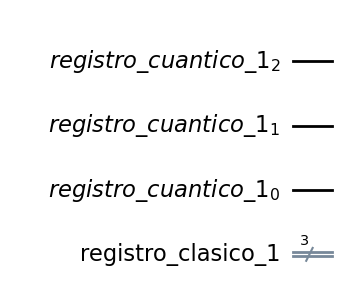

In [ ]:
from qiskit import QuantumCircuit

#Creamos el circuito y añadimos los registros
circ = QuantumCircuit(qreg, creg, name="Circuito de ejemplo")
display(circ.draw(output='mpl', reverse_bits=True))

<h1><font color="#003D7F" size=5>Puertas disponibles</font></h1>

La lista de puertas cuánticas disponibles en qiskit son:
   - Puertas de 1 qubit:
     - **.x(qubit)**: Aplica la puerta **X** al qubit _qubit_.
     - **.y(qubit)**: Aplica la puerta **Y** al qubit _qubit_.
     - **.z(qubit)**: Aplica la puerta **Z** al qubit _qubit_.
     - **.h(qubit)**: Aplica la puerta **Hadamard** al qubit _qubit_.
     - **.rx($\phi$, qubit)**: Realiza una rotación de $\phi$ en el eje **X**  al qubit _qubit_.
     - **.ry($\phi$, qubit)**: Realiza una rotación de $\phi$ en el eje **Y**  al qubit _qubit_.
     - **.rz($\phi$, qubit)**: Realiza una rotación de $\phi$ en el eje **Z**  al qubit _qubit_.
     - **.i(qubit)**: Aplica la puerta **I** al qubit _qubit_.
     - **.s(qubit)**: Aplica la puerta **$\sqrt{Z}$** al qubit _qubit_.
     - **.sdg(qubit)**: Aplica la puerta **$\sqrt{Z}^{\dagger}$** al qubit _qubit_.
     - **.t(qubit)**: Aplica la puerta **$\sqrt[4]{Z}$** al qubit _qubit_.
     - **.tdg(qubit)**: Aplica la puerta **$\sqrt[4]{Z}^{\dagger}$** al qubit _qubit_.
     - **.u($\theta$, $\phi$, $\lambda$, qubit)**: Aplica la matriz:
   
   \begin{equation}
\begin{pmatrix}
\cos{\frac{\theta}{2}} & -e^{i\lambda}\sin{\frac{\theta}{2}}\\
e^{i\phi}\sin{\frac{\theta}{2}} & e^{i\left(\phi+\lambda\right)}\cos{\frac{\theta}{2}}
\end{pmatrix}
\end{equation}


   - Puertas de 2 qubits
     - **.cx(control_qubit, target_qubit)**: Aplica una puerta **X** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.cy(control_qubit, target_qubit)**: Aplica una puerta **Y** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.cz(control_qubit, target_qubit)**: Aplica una puerta **Z** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.ch(control_qubit, target_qubit)**: Aplica una puerta **Hadamard** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.crz($\phi$, control_qubit, target_qubit)**: Aplica una puerta **$R_{z}\left(\phi\right)$** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.cu3($\theta$, $\phi$, $\lambda$, control_qubit, target_qubit)**: Aplica una puerta **$U\left(\theta, \phi, \lambda\right)$** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.swap(qubit1, qubit2)**: Intercambia los qubits _qubit1_ y _qubit2_.
   - Puertas de 3 qubits:
     - **.ccx(control_qubit1, control_qubit2, target_qubit)**: También llamada **Toffoli**, es la puerta **X** controlada por 2 qubits.
     - **.cswap(control_qubit, qubit1, qubit2)**: Realiza un intercambio controlado por el qubit _control_qubit_ entre los qubits _qubit1_ y _qubit2_.
   - Operaciones no unitarias:
     - **.measure(qubit, cbit)**: Mide el qubit o lista de qubits _qubit_ y vuelca el resultado en el bit o lista de bits _cbit_.
   - Operaciones condicionales:
     - Para aplicar una puerta de manera condicional se realiza de la siguiente forma:
       - **.gate(args).c_if(creg, value)**: Aplica la puerta _gate_ si el valor del registro _creg_ es igual al valor _value_.
      

<h1><font color="#003D7F" size=5>Ejemplo de un circuito simple</font></h1>

In [ ]:
from qiskit import QuantumCircuit

#Creamos el circuito y añadimos los registros
circ = QuantumCircuit(qreg, creg, name="Circuito de ejemplo")
circ.ch(qreg[1], qreg[0])
circ.x(qreg[2])
circ.z(qreg[0])
circ.cswap(qreg[2], qreg[1], qreg[0])
circ.measure(qreg[1], creg[0])
circ.ry(2.44, qreg[2]).c_if(creg, 5)

<h1><font color="#003D7F" size=5>Dibujar el circuito</font></h1>

Para visualizar el circuito se usa el método de la clase **QuantumCircuit** _.draw()_. Para visualizar arriba los qubits más significativos y abajo los qubits menos significativos le añadimos el argumento **reverse_bits=True**.

In [ ]:
display(circ.draw(reverse_bits=True))

┌───┐           ┌──────────┐
registro_cuantico_1_2: ┤ X ├──────■────┤ Ry(2.44) ├
                       └───┘      │ ┌─┐└────╥─────┘
registro_cuantico_1_1: ──■────────X─┤M├─────╫──────
                       ┌─┴─┐┌───┐ │ └╥┘     ║      
registro_cuantico_1_0: ┤ H ├┤ Z ├─X──╫──────╫──────
                       └───┘└───┘    ║   ┌──╨──┐   
 registro_clasico_1: 3/══════════════╩═══╡ 0x5 ╞═══
                                     0   └─────┘

Para visualizarlo de manera más agradable podemos usar **Matplotlib**, para ello se lo indicamos con el argumento **output='mpl'**.

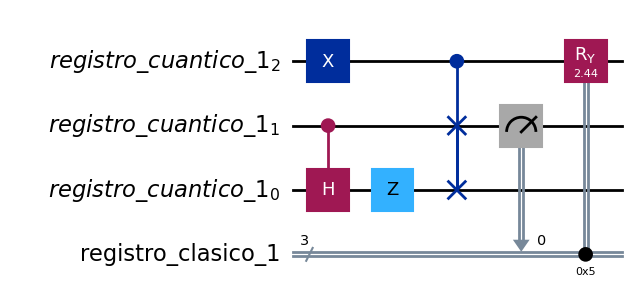

In [ ]:
display(circ.draw(output='mpl', reverse_bits=True))

<h1><font color="#003D7F" size=5>Mediciones</font></h1>

Podemos crear circuitos cuánticos a partir de código o ficheros **OpenQASM**. También podemos exportar el circuito creado a código **OpenQASM**. Para ello se utilizan los siguientes métodos:
 - **QuantumCircuit.from_qasm_str(qasm_str)**: Esta función crea un circuito cuántico a partir de una cadena de caracteres de código **OpenQASM**, donde **qasm_str** es dicha cadena.
 - **qasm2.load(path)**: Esta función importa un circuito cuántico a partir de un fichero **OpenQASM** de **versión 2** que se encuentra en la ruta **path**.
 - **qasm3.load(path)**: Esta función importa un circuito cuántico a partir de un fichero **OpenQASM** de **versión 3** que se encuentra en la ruta **path**.
 - **qasm2.dumps(circuit)**: Devuelve una cadena de caracteres con el circuito cuántico en **OpenQASM 2**.
 - **qasm3.dumps(circuit)**: Devuelve una cadena de caracteres con el circuito cuántico en **OpenQASM 3**.

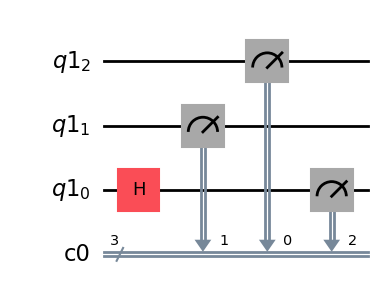

{'100': 58, '000': 42}


In [1]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3)

#Creamos el registro clásico de bits
creg = ClassicalRegister(3)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito cuántico')

circ.h(qreg[0])

#Añadimos las medidas y las volcamos en orden inverso
circ.measure(qreg[:], creg[-1:-4:-1])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

print(counts)

<h1><font color="#003D7F" size=5>Visualización de los resultados</font></h1>

Para la visualización de las mediciones podemos usar la función **plot_histogram(counts)** del módulo **qiskit.visualization**, donde **counts** es el diccionario resultante de las mediciones.

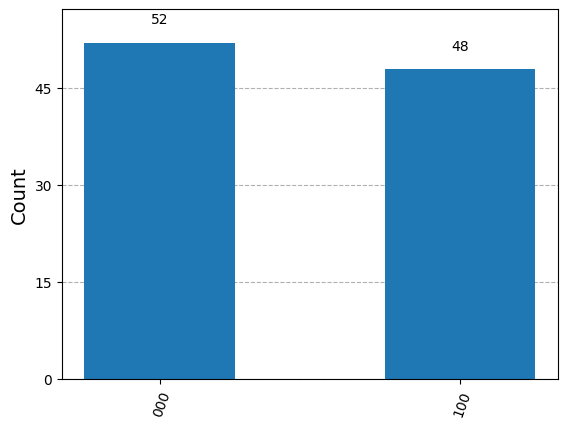

In [ ]:
#Mostramos los resultados
plot_histogram(counts)

<h1><font color="#003D7F" size=5>Orden y representación de los registros y puertas</font></h1>

Por defecto **Qiskit** muestra el circuito con los qubits menos significativos arriba y los más significativos abajo. También al aplicar un operador de varios qubits los aplica por defecto de menos significativos a más significativos. Nosotros vamos a aplicar el orden inverso para que haya una coherencia de las fórmulas matemáticas con los dibujos de los circuitos:
<img src="https://drive.google.com/uc?id=1sjvSRta4SNr02Nz1_8Wx4no1o7i6Uhow" alt="Order explanation" width="700" />

<h1><font color="#003D7F" size=5>OpenQASM en Qiskit</font></h1>

Podemos crear circuitos cuánticos a partir de código o ficheros **OpenQASM**. También podemos exportar el circuito creado a código **OpenQASM**. Para ello se utilizan los siguientes métodos:
 - **QuantumCircuit.from_qasm_str(qasm_str)**: Esta función crea un circuito cuántico a partir de una cadena de caracteres de código **OpenQASM**, donde **qasm_str** es dicha cadena.
 - **qasm2.load(path)**: Esta función importa un circuito cuántico a partir de un fichero **OpenQASM** de **versión 2** que se encuentra en la ruta **path**.
 - **qasm3.load(path)**: Esta función importa un circuito cuántico a partir de un fichero **OpenQASM** de **versión 3** que se encuentra en la ruta **path**.
 - **qasm2.dumps(circuit)**: Devuelve una cadena de caracteres con el circuito cuántico en **OpenQASM 2**.
 - **qasm3.dumps(circuit)**: Devuelve una cadena de caracteres con el circuito cuántico en **OpenQASM 3**.

### Creación de un circuito a partir de una cadena de caracteres

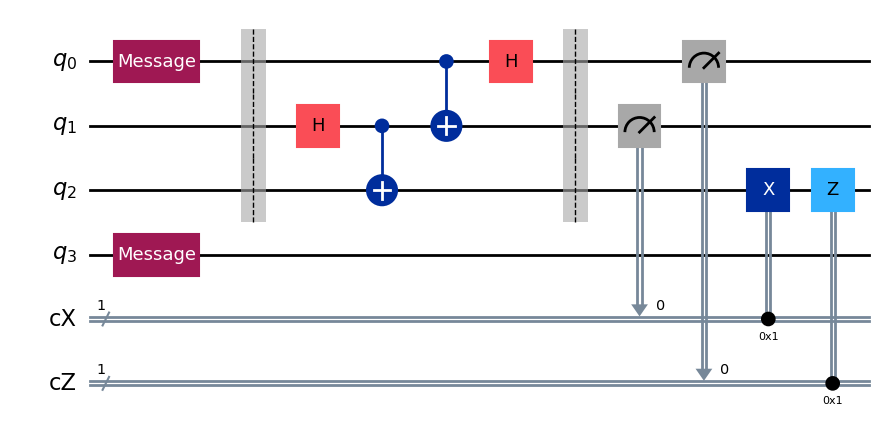

In [ ]:
from qiskit import QuantumCircuit, qasm2, qasm3
import os

qasm_code = '''
        OPENQASM 2.0;
        include "qelib1.inc";
        gate message a {
          u3(pi/8, pi/3, 2.22) a;
        }

        qreg q[4];
        creg cX[1];
        creg cZ[1];

        message q[0];
        barrier q[0],q[1],q[2];
        h q[1];
        cx q[1],q[2];
        cx q[0],q[1];
        h q[0];
        barrier q[0],q[1],q[2];

        measure q[1] -> cX[0];
        measure q[0] -> cZ[0];
        if (cX==1) x q[2];
        if (cZ==1) z q[2];

        message q[3];'''

#Creamos el circuito
circ = QuantumCircuit.from_qasm_str(qasm_code)
display(circ.draw(output='mpl'))

### Exportar un circuito a OpenQASM

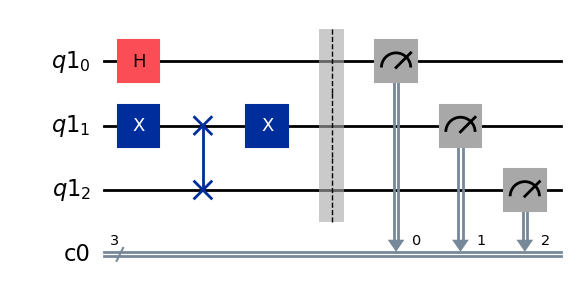

QASM2 Circ
OPENQASM 2.0;
include "qelib1.inc";
qreg q1[3];
creg c0[3];
x q1[1];
swap q1[1],q1[2];
h q1[0];
x q1[1];
barrier q1[0],q1[1],q1[2];
measure q1[0] -> c0[0];
measure q1[1] -> c0[1];
measure q1[2] -> c0[2];
--------------------------------------------------------------------------------
QASM3 Circ
OPENQASM 3.0;
include "stdgates.inc";
bit[3] c0;
qubit[3] q1;
x q1[1];
swap q1[1], q1[2];
h q1[0];
x q1[1];
barrier q1[0], q1[1], q1[2];
c0[0] = measure q1[0];
c0[1] = measure q1[1];
c0[2] = measure q1[2];



In [6]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister, qasm2, qasm3
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3)

#Creamos el registro clásico de bits
creg = ClassicalRegister(3)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito cuántico')
circ.x(qreg[1])
circ.swap(qreg[1], qreg[2])
circ.h(qreg[0])
circ.x(qreg[1])
circ.barrier()

#Añadimos las medidas
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl'))

#Exportamos el circuito
qasm2_circ = qasm2.dumps(circ)
qasm3_circ = qasm3.dumps(circ)
print("QASM2 Circ")
print(qasm2_circ)
print("-"*80)
print("QASM3 Circ")
print(qasm3_circ)

<h1><font color="#003D7F" size=5>Ejercicio</font></h1>

Probar el circuito en <a href="https://quantum-computing.ibm.com/composer/files/new">IBM Composer</a>

<h1><font color="#003D7F" size=5>Ejercicio</font></h1>

Importar el circuito de Grover hecho en formato OpenQASM y visualizarlo. El circuito se encuentra aquí:
https://drive.google.com/uc?export=download&id=1T5xe-Oq1IUE-F8auIjKfFWEw18qToue3

In [4]:
import os

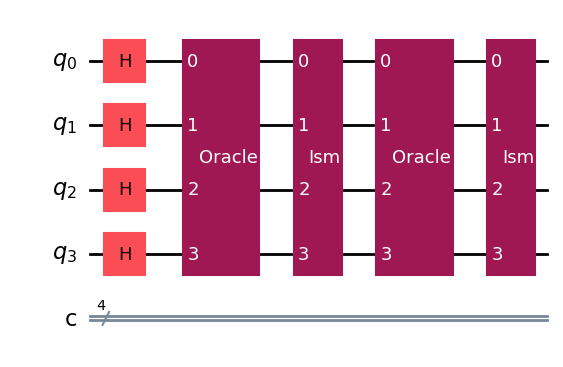

In [7]:
from qiskit import QuantumCircuit

qasm2_path = os.path.join("", "grover_sol.qasm")
circ = qasm2.load(qasm2_path)
#Mostramos el circuito
display(circ.draw(output='mpl'))

#import requests
#from qiskit import qasm2

#url = "https://drive.google.com/uc?export=download&id=1T5xe-Oq1IUE-F8auIjKfFWEw18qToue3"
#response = requests.get(url)
#response.raise_for_status()  # Raise an exception for bad status codes

#qasm_str = response.text
#circ = qasm2.loads(qasm_str)  # Use loads() to load from a string

#Mostramos el circuito
#display(circ.draw(output='mpl'))

Para mostrar el circuito, como tengo el fichero grover_sol.qasm en el mismo directorio que el notebook, he quitado el primer argumento de os.path.join() por "" la cadena vacia

Para visualizar las puertas que hay dentro de los operadores podemos usar la función **.decompose()** que tiene la clase **QuantumCircuit**.

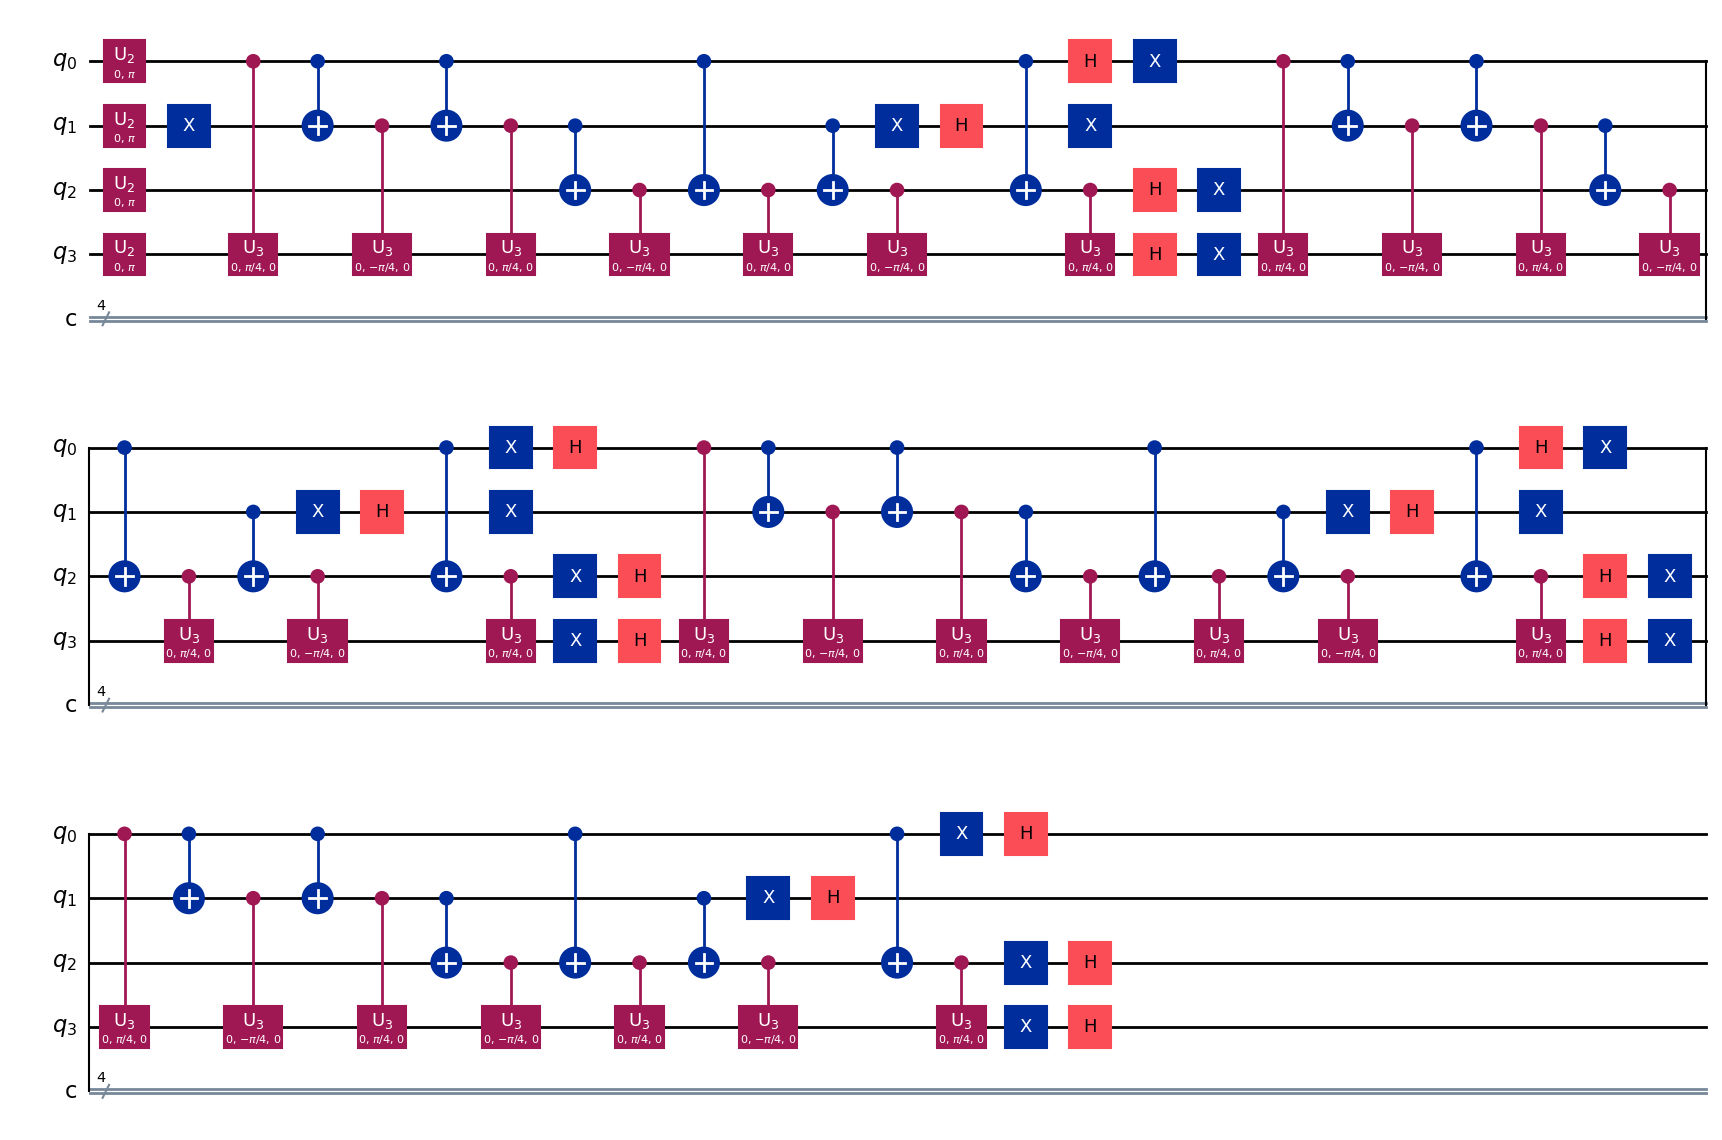

In [ ]:
display(circ.decompose().draw(output='mpl'))

<h1><font color="#003D7F" size=5>Primeros pasos</font></h1>

<h1><font color="#003D7F" size=5>Ejercicio</font></h1>

Crea un par EPR, mide los 2 qubits y muestra los resultados con un diagrama de barras.

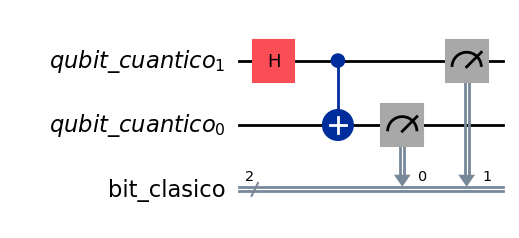

{'11': 498, '00': 502}


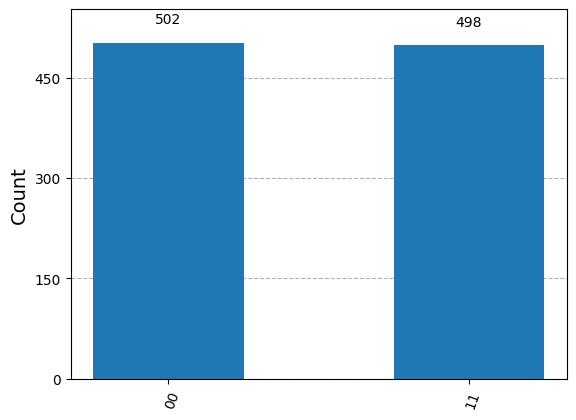

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(2, "qubit_cuantico")

#Creamos el registro clásico de bits
creg = ClassicalRegister(2, "bit_clasico")

#Creamos el circuito
circuito = QuantumCircuit(qreg, creg, name = 'Par_epr')

circuito.h(qreg[1])
circuito.cx(qreg[1], qreg[0]) #Tomo como control el qubit 1 y como objetivo el qubit 0

#Añadimos las medidas y las volcamos en orden inverso
circuito.measure(qreg, creg)

#Mostramos el circuito
display(circuito.draw(output = 'mpl', reverse_bits = True)) #le doy la vuelta para tener los bits mas significativos arriba

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuito, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

En este ejercicio se nos pedía un par Epr, es decir, uno de los estados de Bell que muestran el entrelazamiento cuántico.
Yo lo que he hecho ha sido crear un circuito que obtuviese el estado de Bell: 
$$\ket{\phi^+} = \frac{1}{\sqrt2}(\ket{00} + \ket{11})$$

He usado dos qubits cuanticos, creados con la instruccion $qreg = QuantumRegister(2)$, y luego dos bits clásicos donde guardar la informacion de la madicion final $creg = ClassicalRegister(2)$. 

Una vez creados los registros/bits, los introduzco en un circuito con $circuito = QuantumCircuit(qreg, creg, name =  '...')$.

- Pasos:
    - 1) Estado inicial: $\ket{00}$
    - 2) Aplico Hadamard al qubit 1 (el más significativo, puede ser el qubit 0 también), con la instruccion "$circuito.h(1)$". El estado que me queda es: $\frac{1}{\sqrt2}(\ket{00} + \ket{10})$. 
    - 3) Aplico una $CNOT$ al circuito tomando como control el qubit 1 y como objetivo el qubit 0 (sería al revés se previamente se ha aplicado la Hadamard al qubit 0). Mediante la instruccion $circuito.cx(qreg[1], qreg[0])$

Tras aplicar este último paso, al final el estado que se nos queda es el estado de Bell: $\ket{\phi^+} = \frac{1}{\sqrt2}(\ket{00} + \ket{11})$

Si queremos formar otros estados de Bell, explico cómo se realizaría:
- $\ket{\phi^-} = \frac{1}{\sqrt2}(\ket{00} - \ket{11})$, tendría que colocar antes de la Hadamard una puerta $X$. Debemos empezar con un estado inicial: $\ket{10}$.
- $\ket{\psi^+} = \frac{1}{\sqrt2}(\ket{01} + \ket{10})$, sería igual que el caso de $\ket{\phi^+}$, pero tenemos que aplicar una puerta $X$ al qubit 0 (al que no se ha aplicado la Hadamard) antes de la $CNOT$, es decir, debemos empezar con un estado inicial: $\ket{01}$ 
- $\ket{\psi^-} = \frac{1}{\sqrt2}(\ket{01} - \ket{10})$, debemos aplicar una puerta $X$ al qubit 1 y al 0 al principio, para empezar con un estado inicial: $\ket{11}$

<h1><font color="#003D7F" size=5>Creación de puertas y operadores</font></h1>

Vamos a usar 2 formas de contruir puertas y operadores:
  - A partir de una matriz: Para ello construimos la matriz unitaria con **Numpy** y se la pasamos como parametro al constructor **UnitaryGate** que se encuentra en el módulo **qiskit.circuit.library**. Una vez la tenemos creada la podemos añadir a un circuito con el método **.append(gate, qubits)** donde _gate_ es la puerta creada y _qubits_ es una lista con los qubits a los que se quiere aplicar (tiene que ser del mismo tamaño que el tamaño de la puerta).
  - Por composición de circuitos: Esta forma de crear operadores es crear circuitos e ir añadiendolos al circuito principal mediente el método **.append(circuit, qubits)** donde _circuit_ es el circuito del operador que hemos creado y _qubits_

### A partir de una matriz

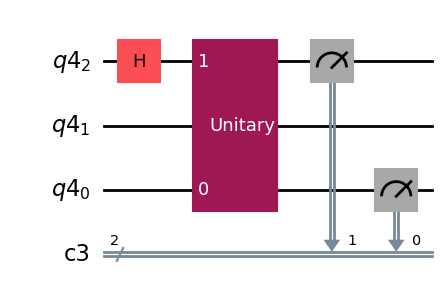

{'00': 52, '11': 48}


In [ ]:
from qiskit.circuit.library import UnitaryGate
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

#import numpy as np
#%run files/aux_func.py



#######equivalente aux_func.py
import numpy as np

X = np.array([[0, 1],
            [1, 0]])

Y = np.array([[0, 1j],
            [1j, 0]])

Z = np.array([[1, 0],
            [0, -1]])

H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1, -1]])

def controlled_e_u(u, e): #Devuelve una matriz controlada. Dependiendo del valor e, que puede ser 0 o 1, que indica que
                            # valor debe tomar el control para que se active la puerta
                            #Para una Cnot, se activaria cuando el control esta a 1
    length = u.shape[0] #Devuelve el tamaño de la dimension 0 de la matriz que en este caso es 2 para la X
    ket_0 = np.array([[1], [0]])
    ket_1 = np.array([[0], [1]])
    if e == 1:
        return np.add(np.kron(np.outer(ket_0, ket_0), np.eye(length)), np.kron(np.outer(ket_1, ket_1), u))
    else:
        return np.add(np.kron(np.outer(ket_0, ket_0), u), np.kron(np.outer(ket_1, ket_1), np.eye(length)))


#####
###equivalente aux_func.py


cnot_matrix = controlled_e_u(X, 1)


cnot_gate = UnitaryGate(cnot_matrix)

qreg = QuantumRegister(3)
creg = ClassicalRegister(2)
circ = QuantumCircuit(qreg, creg)


#ism_ctrl = ism_3_gate.control(1, 'Controlled ISM', 1)
circ.h(2)
circ.append(cnot_gate, [0, 2])

circ.measure(qreg[2], creg[1])
circ.measure(qreg[0], creg[0])

display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

print(counts)

### Composición de circuitos

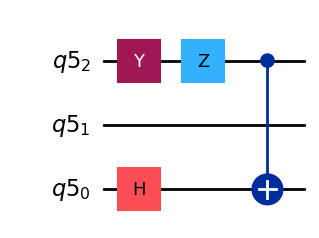

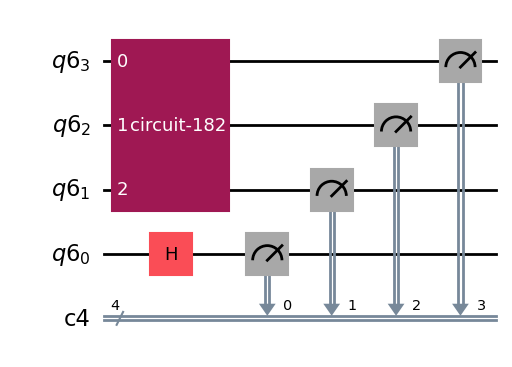

{'1010': 19, '0010': 36, '1011': 23, '0011': 22}


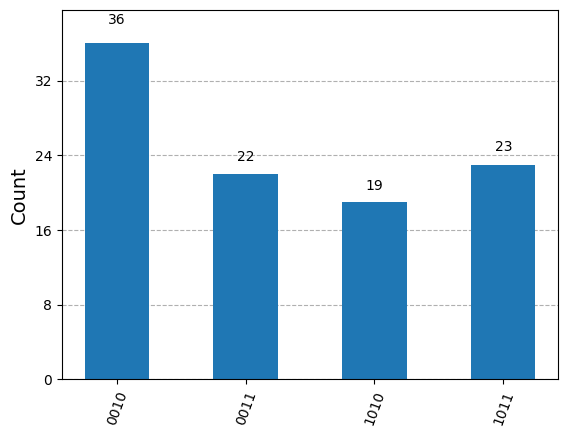

In [ ]:
from qiskit.circuit.library import UnitaryGate
import numpy as np

#Creación del operador
qreg1 = QuantumRegister(3)
circuit_operator = QuantumCircuit(qreg1)

circuit_operator.y(2)
circuit_operator.z(2)
circuit_operator.h(0)
circuit_operator.cx(2, 0)
display(circuit_operator.draw(output='mpl', reverse_bits=True))


#Creación del circuito principal
qreg2 = QuantumRegister(4)
creg2 = ClassicalRegister(4)
circ = QuantumCircuit(qreg2, creg2)

circ.h(0)
circ.append(circuit_operator, [3, 2, 1])

circ.measure(qreg2, creg2)

display(circ.draw(output='mpl', reverse_bits=True))

#display(circ.decompose().draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)


<h1><font color="#003D7F" size=5>Puertas multicontroladas</font></h1>

Las 2 principales puertas multicontroladas que vamos a usar son:
  - **.mcx(control_qubits, target_qubit)**: Esta puerta es una puerta **X** multicontrolada, donde _control_qubits_ es una lista con los qubits de control y _target_qubit_ es el qubit al que se le aplica la puerta.
  - **.mcmt(gate, num_ctrl_qubits, num_target_qubits)**: Aplica una puerta _gate_ a un número de qubits _num_target_qubits_ controlada por un número de qubits _num_ctrl_qubits_ tanto los qubits de control como los de objetivo son consecutivos y empiezan por el menos significativo.
  
También hay otra forma de crear puertas controladas, es con el método **.control(n_controls)** que tienen las puertas y circuitos donde el parámetro _n\_controls_ es el número de controles que va a tener.

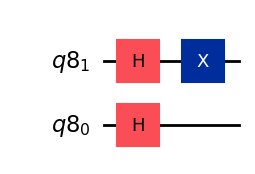

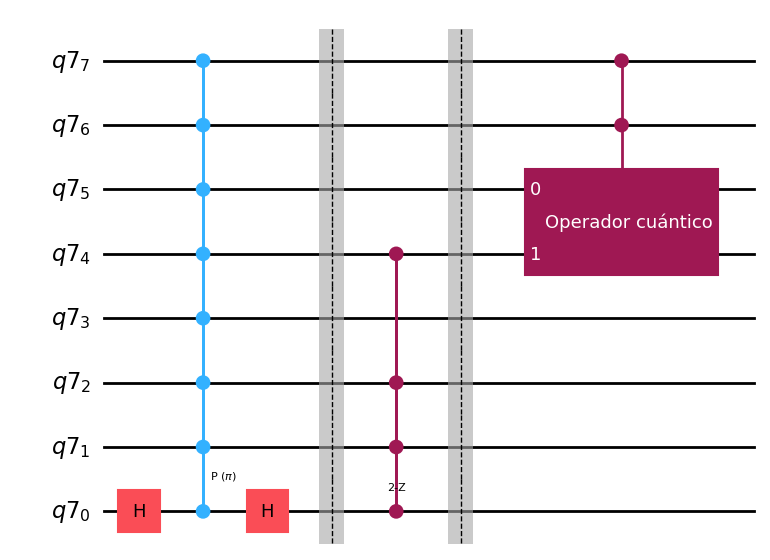

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT, ZGate

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(8)

#Creamos el circuito
circ = QuantumCircuit(qreg, name='Circuito cuántico')

#Añadimos las diferentes puertas multicontroladas
circ.mcx([7 - i for i in range(7)], 0)
circ.barrier()
circ.append(MCMT('z', num_ctrl_qubits=3, num_target_qubits=2), [i for i in range(5)])
circ.barrier()

qreg2 = QuantumRegister(2)
operator_circ = QuantumCircuit(qreg2, name='Operador cuántico')
operator_circ.h(qreg2)
operator_circ.x(1)
#Mostramos el circuito

circ.append(operator_circ.control(2), [8 - i - 1 for i in range(4)])

#Mostramos el circuito
display(operator_circ.draw(output='mpl', reverse_bits=True))
display(circ.decompose().draw(output='mpl', reverse_bits=True))

<h1><font color="#003D7F" size=10>Ejercicio</font></h1>

Crear la puerta $C^{5}X$ con cada uno de las 3 formas explicadas, teniendo en cuenta que los qubits de control tienen que ser los más significativos.

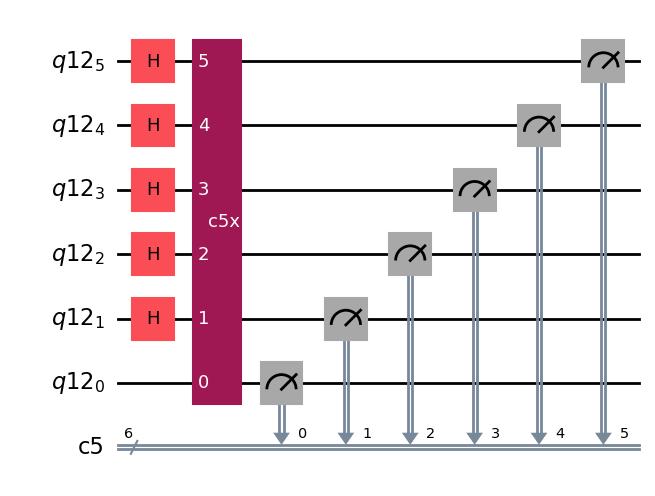

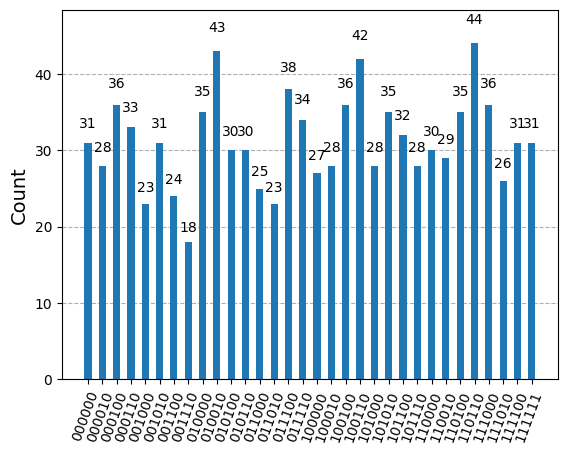

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT, XGate, UnitaryGate
import numpy as np

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(6)
creg = ClassicalRegister(6)
#Creamos el circuito
circuito1 = QuantumCircuit(qreg,creg, name = 'Circuito1')


#Mediante Numpy


def controlled_e_u(u, e): #Utilizo la funcion aportado anteriormente
    length = u.shape[0] #Devuelve el tamaño de la dimension 0 de la matriz que en este caso es 2 para la X
    ket_0 = np.array([[1], [0]])
    ket_1 = np.array([[0], [1]])
    if e == 1:
        return np.add(np.kron(np.outer(ket_0, ket_0), np.eye(length)), np.kron(np.outer(ket_1, ket_1), u))
    else:
        return np.add(np.kron(np.outer(ket_0, ket_0), u), np.kron(np.outer(ket_1, ket_1), np.eye(length)))
    
#A_
c5x_matriz = np.array([[0, 1], [1, 0]]) #Lo inicializo como una puerta not
for i in range(5):
    c5x_matriz = controlled_e_u(c5x_matriz, 1)

c5x_Numpy = UnitaryGate(c5x_matriz, label = 'c5x')
#B_


circuito1.h([5 - i for i in range(5)])
circuito1.append(c5x_Numpy, [i for i in range(6)])

circuito1.measure(qreg, creg)


display(circuito1.draw(output = 'mpl', reverse_bits = True))

backend1 = Aer.get_backend('qasm_simulator')
transpiled_circuit1 = transpile(circuito1, backend = backend1, optimization_level = 1)
job1 = backend1.run(transpiled_circuit1, shots = 1000)
result1 = job1.result()
counts1 = result1.get_counts()

plot_histogram(counts1)


Para este ejercicio donde tenemos que crear la puerta $C^5X$ me he tomado la libertad para realizarlo de una manera extra, que es con matrices usando Numpy. \
La razón es porque pensaba en un principio que se nos pedía crear la puerta de las 3 siguientes formas aprendidas: 
- Usando Numpy
- Usando composicion de puertas (me di cuenta leyendo el paper de la siguiente sección, que se haría falta cerca de 60 puertas $V$, $V^\dagger$, $CNOT$ y que sería demasiado largo). 
- Usando puertas multicontroladas.

Al final vi que solo había que utilizar las 3 funciones para crear puertas multicontroladas que se ve en la sección anterior. Entonces, ese ejercicio lo realizo en la celda siguiente a esta. 

Pero antes de nada, voy a explicar lo que he hecho usando matrices con Numpy y la función para crear puertas controladas, que se nos proporciona en la seccion correspondiente del Notebook. 

Se nos proporciona previamente una funcion $controled\_e\_u(u, e)$ que convierte la matriz unitaria $U$ en otra matriz unitaria $CU$ controlada y que se activa para aplicar $U$ cuando el qubit de control esté a "$e$".

En el ejemplo que se nos muestra al llamar a $controled\_e\_u(X, 1)$ obtenemos una $CNOT$ o $CX$. Entonces si le pasamos a la funcion $controled\_e\_u(CX, 1)$ obtendriamos una otra matriz que representa la puerta $C^2X$. 

Por ello para crear la puerta $C^5X$ he iterado 5 veces la llamada a la funcion $controlled\_e\_u()$, partiendo de una matriz inicial $X$. 
Se puede ver en la seccion de código que he comentado como $\#A\_$ hasta $\#B\_$. 

Para ver el correcto funcionamiento de la puerta, he aplicado una Hadamard al inicio a los 5 qubits de control y dejado el objetivo que es el qubit 0 a $\ket{0}$. Como se ve en el histograma, la puerta se aplica correctamente en el caso que los controles están a $\ket{11111}\ket{0}$, que pasa, tras aplicar $X$, a $\ket{11111}\ket{1}$. En los demás casos, el qubit 0 se queda en $\ket{0}$.


C:\Users\zheng\AppData\Local\Temp\ipykernel_25620\1466709569.py:16: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.mcmt.MCMT`` is deprecated as of qiskit 1.4. It will be removed no earlier than 3 months after the release date. Use MCMTGate instead.
  circuito3.append(MCMT('x', num_ctrl_qubits= 5, num_target_qubits= 1), [5 - i for i in range(6)])


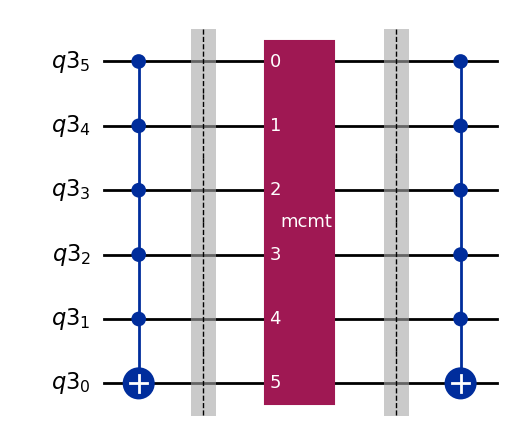

In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT, XGate

#Mediante puertas multicontroladas

qreg3 = QuantumRegister(6)

circuito3 = QuantumCircuit(qreg3, name = 'Circuito3')


circuito3.mcx([5 - i for i in range(5)], 0) #Puerta multicontrolada de 5 qubits de control y uno de objetivo

circuito3.barrier()

circuito3.append(MCMT('x', num_ctrl_qubits= 5, num_target_qubits= 1), [5 - i for i in range(6)])

circuito3.barrier()

circuito3.append(XGate().control(5), [5 - i for i in range(6)])




display(circuito3.draw(output = 'mpl', reverse_bits = True))


# backend3 = Aer.get_backend('qasm_simulator')
# transpiled_circuit3 = transpile(circuito3, backend = backend3, optimization_level = 1)
# job3 = backend3.run(transpiled_circuit3, shots = 1000)
# result3 = job3.result()
# counts3 = result3.get_counts()

# plot_histogram(counts3)



En esta sección he realizado lo que se nos pedía: Crear la puerta $C^5X$ usando las 3 funciones de puertas multicontroladas que se nos ha enseñado arriba.

1) Funcion $.mcx(control_qubits, target_qubit)$: Con la llamada a $circuito3.mcx([5 - i\ for\ i\ in\ range(5)], 0)$. Así se añade una puerta X controlada con la lista de qubits que le paso como control, que en mi caso es del 4 al 1 (ambos incluidos) y utilizo el qubit 0 como objetivo. 

2) Usar MCMT: Usando el constructor MCMT('puerta', num_ctrl_qubits, num_target_qubits) podemos crear una puerta 'puerta' con tantos qubits de controls como indica "num_ctrl_qubits" y tantos qubits objetivo como se indica en "num_target_qubits". \
Creo la puerta con la llamada: $MCMT('x', num\_ctrl\_qubits= 5, num\_target\_qubits= 1)$ y lo añado al circuito con la llamada: \
\
$circuito3.append(MCMT('x', num\_ctrl\_qubits= 5, num\_target\_qubits= 1), [5 - i\ for\ i\ in\ range(5)])$. \
\
Coloco la lista de los qubits a los que quiero aplicar la puerta en orden inverso porque tras varias pruebas he visto que primero se colocan los controles de la puerta y luego los objetivo. Por ellos quiero que sean control los qubits [5, 4, 3, 2, 1].

3) Usando la funcion $.control(n)$. De la librería de .circuits de Qiskit saco la puerta X que se obtiene con el constructor XGate().\
Con la llamada $XGate().control(5)$ puedo crear una puerta X con 5 qubits de control. Al final lo añado al circuito usando .append() y lo tendríamos listo.

<h1><font color="#003D7F" size=5>Ejecución en un computador cuántico real</font></h1>

Para ejecutar un circuito cuántico en un computador real de IBM vamos a seguir los siguientes pasos:
  1. Obtenemos el proveedor de IBM con **QiskitRuntimeService(channel="ibm_quantum", token=token)** donde _token_ es la credencial proporcionada por IBM.
  2. Obtenemos el computador cuántico donde queremos ejecuarlo con **.backend(backend_name)** o **.least_busy(simulator=False, operational=True)** donde _backend_name_ es el nombre del computador cuántico.
     -  Con **.backends()** podemos ver los backends disponibles.
  4. Creamos el circuito.
  5. Ejecutamos el circuito.
  6. Mostramos los resultados.

In [ ]:
!pip install qiskit_ibm_runtime

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

token = "306704e2ff44103e465ba150d6ad9c3371a69961184e234eda5889ae7f3cac65ffabf32fa1565725300d8113acccb2cb1ee6dc400cabf8f8a80e5f20417b9e74"

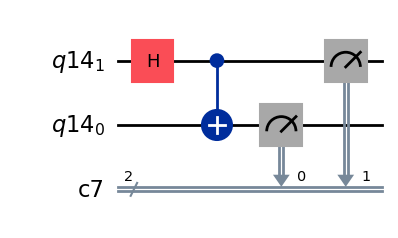

Backends disponibles: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


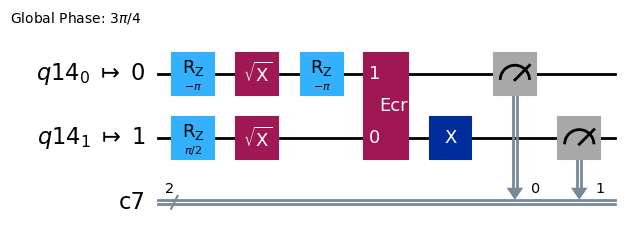

In [ ]:

#Creamos el circuito
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
circ = QuantumCircuit(qreg, creg)

circ.h(1)
circ.cx(1, 0)

circ.measure(qreg, creg)

display(circ.draw(output='mpl', reverse_bits=True))

# Ejecutamos en un backend real
service = QiskitRuntimeService(channel="ibm_quantum", token=token)

print("Backends disponibles:", service.backends())

backend = service.least_busy(simulator=False, operational=True)
#backend = service.backend('ibm_brisbane')

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ)

isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
# Ejecutamos el circuito
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cz5p2qjh0kc0008940ag
PrimitiveResult([SamplerPubResult(data=DataBin(c7=BitArray(<shape=(), num_shots=100, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-03-07 21:13:06', stop='2025-03-07 21:13:06', size=100>)])}, 'version': 2})


{'10': 5, '00': 39, '11': 53, '01': 3}


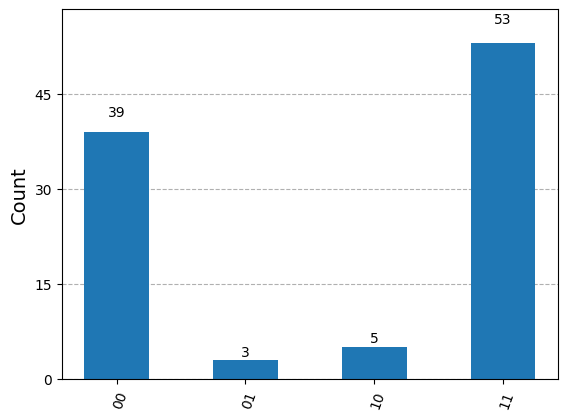

In [ ]:
# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))

<h1><font color="#004D7F" size=5>Ejercicios</font></h1>

<h1><font color="#003D7F" size=6>Ejercicio</font></h1>

Crear la puerta $C^{3}X$ haciendo uso de **Numpy** para calcular **V** y siguiendo el esquema siguiente:

<img src="https://drive.google.com/uc?id=1cD4lLxkz25B-gsP54EkdHMngc52EZ1xx" alt="Qiskit elements" width=700>


Con $U=X$, $V=\sqrt[4]{U}$ y:
\begin{equation}
\sqrt[n]{X} = \frac{1}{2}
\begin{pmatrix}
1+e^{\frac{i\pi}{n}} & 1-e^{\frac{i\pi}{n}} \\
1-e^{\frac{i\pi}{n}} & 1+e^{\frac{i\pi}{n}}
\end{pmatrix}
\end{equation}


Ayuda: $e^x$ en numpy es numpy.exp(x).

<a href="https://arxiv.org/pdf/quant-ph/9503016.pdf"> http://arxiv.org/abs/quant-ph/9503016v1 </a>

In [ ]:
import numpy as np

def raiz_n_de_X(n): 
    V = np.array([[(1/2)*(1 + np.exp(np.pi*1j/n)), (1/2)*(1 - np.exp(np.pi*1j/n))],
                  [(1/2)*(1 - np.exp(np.pi*1j/n)), (1/2)*(1 + np.exp(np.pi*1j/n))]])
    return V
    
    

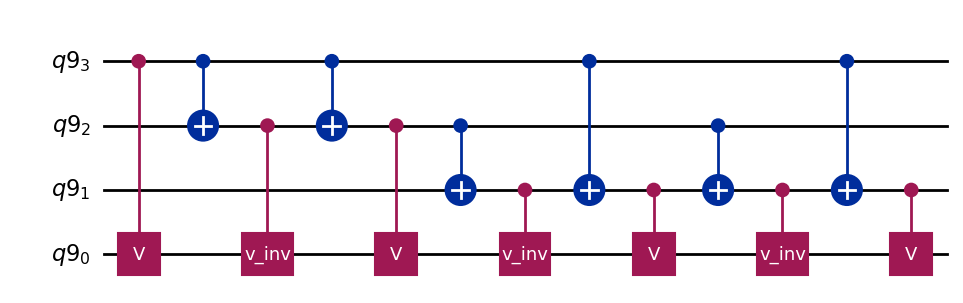

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_aer import Aer
from qiskit.circuit.library import UnitaryGate
import numpy as np


#Creamos el registro cuántico de qubits
qreg = QuantumRegister(4)

#Creamos el circuito
c3x = QuantumCircuit(qreg, name = 'Puerta3Toffoli')

v_matriz = raiz_n_de_X(4) #Obtengo la puerta V

v_inv_matriz = np.conjugate(v_matriz).T #Obtengo la inversa que es la adjunta

v_gate = UnitaryGate(v_matriz, label = 'V') #Los convierto en puertas unitarias que se puedan usar en un circuito
v_inv_gate = UnitaryGate(v_inv_matriz, label = 'v_inv')


c3x.append(v_gate.control(1), [3, 0])
c3x.cx(3, 2)
c3x.append(v_inv_gate.control(1), [2, 0])
c3x.cx(3, 2)
c3x.append(v_gate.control(1), [2, 0])
c3x.cx(2, 1)
c3x.append(v_inv_gate.control(1), [1, 0])
c3x.cx(3, 1)
c3x.append(v_gate.control(1), [1, 0])
c3x.cx(2, 1)
c3x.append(v_inv_gate.control(1), [1, 0])
c3x.cx(3, 1)
c3x.append(v_gate.control(1), [1, 0])


display(c3x.draw(output = 'mpl', reverse_bits = True))




Para este ejercicio he usado Numpy para calcular la matriz de V que nos pedía. \
Para crear la matriz, he usado la funcion que he escrito "raiz_n_x(n)" que me obtiene una matriz V tal que: \
$V^n = X$ 

En nuestro caso necesitabamos una $V$ tal que: $V^4 = X$ para crear una CNOT con 3 qubits de control. La funcion serviría si quisiéramos crear Toffolis con otra cantidad de qubits de control. 

Por ejemplo para el caso de una $C^5X$ que hemos visto en un ejercicio anterior, leyendo el paper que se adjunta en este ejercicio, se haría falta una $V$ tal que $V^{16} = X$.

Entonces, una vez teniendo la matriz creada usando Numpy, también creo la matriz inversa que, al ser una matriz unitaria, es la conjugada transpuesta usando las funciones .conjugate() y .T de Numpy.

A través del contructor de UnitaryGate(), los convierto en puertas cuánticas para que puedan ser insertadas en el circuito con .append().
Además, utilizo la funcion .control() de las puertas para convertirlas en puertas controladas al añadirlos al circuito, y para la puerta CNOT, solo utilizo la funcion .cx() para agregar la puerta.

- Observacion: Siguiendo lo que se explica en el paper de este ejercicio también podríamos crear una $C^5X$, pero harían falta un total de 31 puertas entre $V$ y $V^\dagger$ y por otro lado 29 puertas $CNOT$, en la forma óptima de contruirlo. 

A continuacion voy a mostrar un ejemplo de uso de la puerta que acabo de crear.

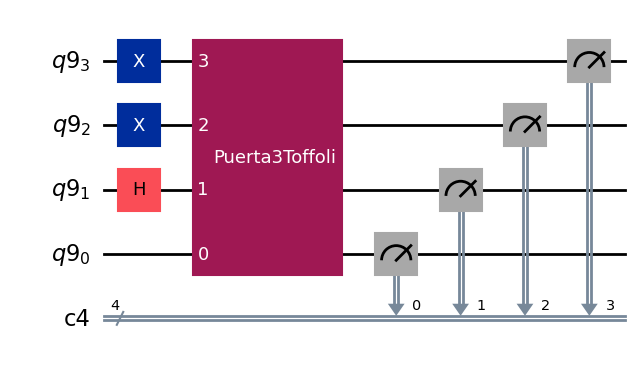

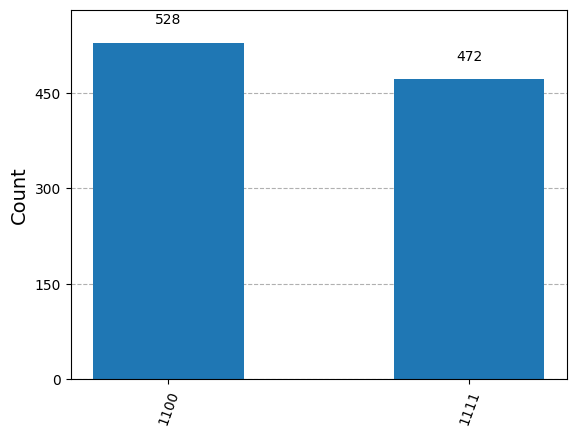

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

qregistros = QuantumRegister(4)

cregistros = ClassicalRegister(4)

circ_prueba = QuantumCircuit(qreg, creg, name = 'Circ_prueba_C3X')

#circ_prueba.h(0)
circ_prueba.x([3 - i for i in range(2)]) #Aplico una puerta x sobre los qubits 3 y 2
circ_prueba.h(1) 

circ_prueba.append(c3x, [i for i in range (4)]) #Agrego la puerta que hemos creado en la celda anterior que es la C3X

circ_prueba.measure(qreg, creg)

#Mostramos el circuito
display(circ_prueba.draw(output = 'mpl', reverse_bits = True))


#Lanzamos la simulacion y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ_prueba, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)



En este circuito he invertido los dos qubits de arriba con tal tener ya $\ket{11}$ y he aplicado una Hadamard al qubit 1 para generar superposicion en dicho qubit y así ver cuándo sí cambia el qubit 0.

Vemos que el qubit 0 teniendo un estado inicial $\ket{0}$ pasa a $\ket{1}$ cuando el qubit 1 está a $\ket{1}$